![](img/solar_logo.png)
# Lecture 2: Clustering of sequential data in education

Quan Nguyen, Department of Statistics, University of British Columbia

In [1]:
library(tidyverse)
library(TraMineR)
library(cluster)

── Attaching packages ──────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1



Warning message:
“package ‘tibble’ was built under R version 4.1.1”


Warning message:
“package ‘readr’ was built under R version 4.1.1”


── Conflicts ─────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Warning message:
“package ‘TraMineR’ was built under R version 4.1.1”



TraMineR stable version 2.2-3 (Built: 2022-01-26)



Website: http://traminer.unige.ch



Please type 'citation("TraMineR")' for citation information.




Warning message:
“package ‘cluster’ was built under R version 4.1.1”


## 1. Similarities and distances between sequences

Similarity between sequences can be measured via

- **Common attributes**: The more common attributes, the more similar 
- **Edit distance**: The lower the edit cost, the more similar

In [2]:
data(famform)
famform.seq <- seqdef(famform)
print(famform.seq)

 [>] found missing values ('NA') in sequence data



 [>] preparing 5 sequences



 [>] coding void elements with '%' and missing values with '*'



 [>] 5 distinct states appear in the data: 



     1 = M



     2 = MC



     3 = S



     4 = SC



     5 = U



 [>] state coding:



       [alphabet]  [label]  [long label] 



     1  M           M        M



     2  MC          MC       MC



     3  S           S        S



     4  SC          SC       SC



     5  U           U        U



 [>] 5 sequences in the data set



 [>] min/max sequence length: 2/5



    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


### Common attributes
#### Longest Common Prefix (LCP) distances

[1] S-U        
[2] S-U-M 

Longest Common Prefix = [S-U]

Similarity = 2  
Dismilarity = 1

In [3]:
seqdist(famform.seq, method='LCP')

 [>] 5 sequences with 5 distinct states



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the LCP metric



 [>] elapsed time: 0.007 secs



,[1],[2],[3],[4],[5]
[1],0,1,2,3,5
[2],1,0,1,2,6
[3],2,1,0,1,7
[4],3,2,1,0,8
[5],5,6,7,8,0


We can also produce a normalized version of LCP that is insensitive to the length of the sequences

In [4]:
print(famform.seq)
seqdist(famform.seq, method='LCP', norm="auto")

    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


 [>] 5 sequences with 5 distinct states



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the LCP gmean normalized metric



 [>] elapsed time: 0.007 secs



,[1],[2],[3],[4],[5]
[1],0.0000000,0.1835034,0.2928932,0.3675445,1
[2],0.1835034,0.0000000,0.1339746,0.2254033,1
[3],0.2928932,0.1339746,0.0000000,0.1055728,1
[4],0.3675445,0.2254033,0.1055728,0.0000000,1
[5],1.0000000,1.0000000,1.0000000,1.0000000,0


#### Longest common suffix ("RLCP")
     
[3] S-U-M-MC    
[5] U-M-MC 

Longest Common Suffix = [U-M-MC]

Similarity = 3  
Dismilarity = 1

In [5]:
print(famform.seq)
seqdist(famform.seq, method='RLCP')

    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


 [>] 5 sequences with 5 distinct states



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the RLCP metric



 [>] elapsed time: 0.004 secs



,[1],[2],[3],[4],[5]
[1],0,5,6,7,5
[2],5,0,7,8,6
[3],6,7,0,9,1
[4],7,8,9,0,8
[5],5,6,1,8,0


#### Longest Common Subsequence (LCS) distances

Let's take a look at this example:

[4] S-U-M-MC-SC  
[5] U-M-MC 

Longest Common Subsequence = [U-M-MC]

Similarity = 3  
Dismilarity = 2

In [6]:
print(famform.seq)
seqdist(famform.seq, method='LCS')

    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


 [>] 5 sequences with 5 distinct states



 [>] creating a 'sm' with a substitution cost of 2



 [>] creating 5x5 substitution-cost matrix using 2 as constant value



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the LCS metric



 [>] elapsed time: 0.006 secs



,[1],[2],[3],[4],[5]
[1],0,1,2,3,3
[2],1,0,1,2,2
[3],2,1,0,1,1
[4],3,2,1,0,2
[5],3,2,1,2,0


In [7]:
# Normalized version

seqdist(famform.seq, method='LCS', norm = 'auto')

 [>] 5 sequences with 5 distinct states



 [>] creating a 'sm' with a substitution cost of 2



 [>] creating 5x5 substitution-cost matrix using 2 as constant value



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the LCS gmean normalized metric



 [>] elapsed time: 0.005 secs



,[1],[2],[3],[4],[5]
[1],0.0000000,0.1835034,0.2928932,0.3675445,0.5917517
[2],0.1835034,0.0000000,0.1339746,0.2254033,0.3333333
[3],0.2928932,0.1339746,0.0000000,0.1055728,0.1339746
[4],0.3675445,0.2254033,0.1055728,0.0000000,0.2254033
[5],0.5917517,0.3333333,0.1339746,0.2254033,0.0000000


#### Dealing with missing values

In [8]:
s1 <- c("a","b","c","d",NA,NA)
s2 <- c("a","b",NA,"c","d",NA)
s3 <- c("a","b",NA,"c","d","a")

df <- data.frame(rbind(s1,s2,s3))
colnames(df) <- c(1990:1995)
df.seq <- seqdef(df)
print(df.seq)

 [>] found missing values ('NA') in sequence data



 [>] preparing 3 sequences



 [>] coding void elements with '%' and missing values with '*'



 [>] 4 distinct states appear in the data: 



     1 = a



     2 = b



     3 = c



     4 = d



 [>] state coding:



       [alphabet]  [label]  [long label] 



     1  a           a        a



     2  b           b        b



     3  c           c        c



     4  d           d        d



 [>] 3 sequences in the data set



 [>] min/max sequence length: 4/6



   Sequence   
s1 a-b-c-d    
s2 a-b-*-c-d  
s3 a-b-*-c-d-a


To compute LCS distances between sequences containing gaps, one can use the with.miss=TRUE option. In that case, missing states are considered as an additional valid state.

Let's look at s1 and s2

LCS = a-b or c-d 

Similarity = 2  
Dismilarity = 1

In [9]:
seqdist(df.seq, method='LCS', with.miss=TRUE)

 [>] including missing values as an additional state



 [>] 3 sequences with 5 distinct states



 [>] creating a 'sm' with a substitution cost of 2



 [>] creating 5x5 substitution-cost matrix using 2 as constant value



 [>] 3 distinct  sequences 



 [>] min/max sequence lengths: 4/6



 [>] computing distances using the LCS metric



 [>] elapsed time: 0.015 secs



,s1,s2,s3
s1,0,1,2
s2,1,0,1
s3,2,1,0


In [10]:
# ?seqdist

### Edit distance

#### Optimal matching (OM) distances

Optimal matching generates edit distances that are the minimal cost, in terms of `insertions`, `deletions` and `substitutions`, for transforming one sequence into another.

How do we transform the following sequence 1 to sequence 2

s1 = {N,A,T,I,O,N}  
s2 = {F,A,S,H,I,O,N}

Strategy 1:
- Substitute N with F (NATION -> FATION)
- Insert S (FATION -> FASTION)
- Substitute T with H (FASTION -> FASHION)

Strategy 2:
- Delete N (NATION -> ATION)
- Insert F (ATION -> FATION)
- Delete T (FATION -> FAION)
- Insert S (FAION -> FASION)
- Insert H (FASION -> FASHION)

Assuming there's a cost for each action (i.e., substitution, insertion/deletion). What would be the optimal strategy that minizes the total cost? --> Optimal Matching algorithm

**The insertion/deletion cost**
- A constant value specified by user (default = 1)

**The substitution-cost matrix**
- A constant value (default)
- Based on transition rates between different states

Let's have a look at our famform data. We generate a **substitution cost matrix with constant value of 2**

In [11]:
print(famform.seq)
sub_cost <- seqcost(famform.seq, method = "CONSTANT", cval = 2)
sub_cost

    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


 [>] creating 5x5 substitution-cost matrix using 2 as constant value



,M,MC,S,SC,U
M,0,2,2,2,2
MC,2,0,2,2,2
S,2,2,0,2,2
SC,2,2,2,0,2
U,2,2,2,2,0


We compute the distances using the matrix and the **default indel cost of 1**

In [12]:
famform.seq_OM <- seqdist(famform.seq, method = "OM", sm = sub_cost$sm)
famform.seq_OM

 [>] 5 sequences with 5 distinct states



 [>] checking 'sm' (size and triangle inequality)



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the OM metric



 [>] elapsed time: 0.004 secs



,[1],[2],[3],[4],[5]
[1],0,1,2,3,3
[2],1,0,1,2,2
[3],2,1,0,1,1
[4],3,2,1,0,2
[5],3,2,1,2,0


Minimal cost to transform `[1] S-U` to `[5] U-M-MC`

- Delete S (cost 1)
- Insert M (cost 1)
- Insert MC (cost 1)

Total cost = 3

In [13]:
famform.seq_OM[1,5]

[1] 3

Substitution cost matrix based on transition rates between different states using `method = "TRATE"`

In [14]:
print(famform.seq)
sub_cost_TRATE <- seqcost(famform.seq, method = "TRATE", cval = 2)
sub_cost_TRATE
seqdist(famform.seq, method = "OM", sm = sub_cost_TRATE$sm)

    Sequence   
[1] S-U        
[2] S-U-M      
[3] S-U-M-MC   
[4] S-U-M-MC-SC
[5] U-M-MC     


 [>] creating substitution-cost matrix using transition rates ...



 [>] computing transition probabilities for states M/MC/S/SC/U ...



,M,MC,S,SC,U
M,0,1,2,2,1
MC,1,0,2,1,2
S,2,2,0,2,1
SC,2,1,2,0,2
U,1,2,1,2,0


 [>] 5 sequences with 5 distinct states



 [>] checking 'sm' (size and triangle inequality)



 [>] 5 distinct  sequences 



 [>] min/max sequence lengths: 2/5



 [>] computing distances using the OM metric



 [>] elapsed time: 0.007 secs



,[1],[2],[3],[4],[5]
[1],0,1,2,3,3
[2],1,0,1,2,2
[3],2,1,0,1,1
[4],3,2,1,0,2
[5],3,2,1,2,0


Check the documentation for other methods of generating substitution costs `?seqcost`

In [15]:
?seqcost

In [16]:
# ?seqdist

## 2. Agglomerative clustering of sequences

Some background on hierarchical clustering:

Broadly speaking, there are two types:
- **Agglomerative clustering**: Commonly referred to as AGNES (AGglomerative NESting) 
    - Bottom-up approach
    - The two data points that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are a member of just one single big cluster (root)

- **Divisive hierarchical clustering**: Commonly referred to as DIANA (DIvise ANAlysis)
    - Top-down approach
    - Start with one single big cluster (root), at each iteration, we split the cluster into two least similar clusters, and repeat until each cluster contains a single data point
    
![](https://miro.medium.com/max/1254/0*E-qictlO_9isi0Dl.png)

Source of figure: https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

In this lecture, we will focus on the agglomerative clustering. We are going to use the `agnes()` function from the `cluster` package in R. Essentially, we are going to feed a dissimilarity matrix and specify the method to measure the distance (or similarity) between two clusters of observations.

In [17]:
clusterward <- agnes(famform.seq_OM, diss = TRUE, method = "ward")

,[1],[2],[3],[4],[5]
,<fct>,<fct>,<fct>,<fct>,<fct>
[1],S,U,%,%,%
[2],S,U,M,%,%
[3],S,U,M,MC,%
[4],S,U,M,MC,SC
[5],U,M,MC,%,%


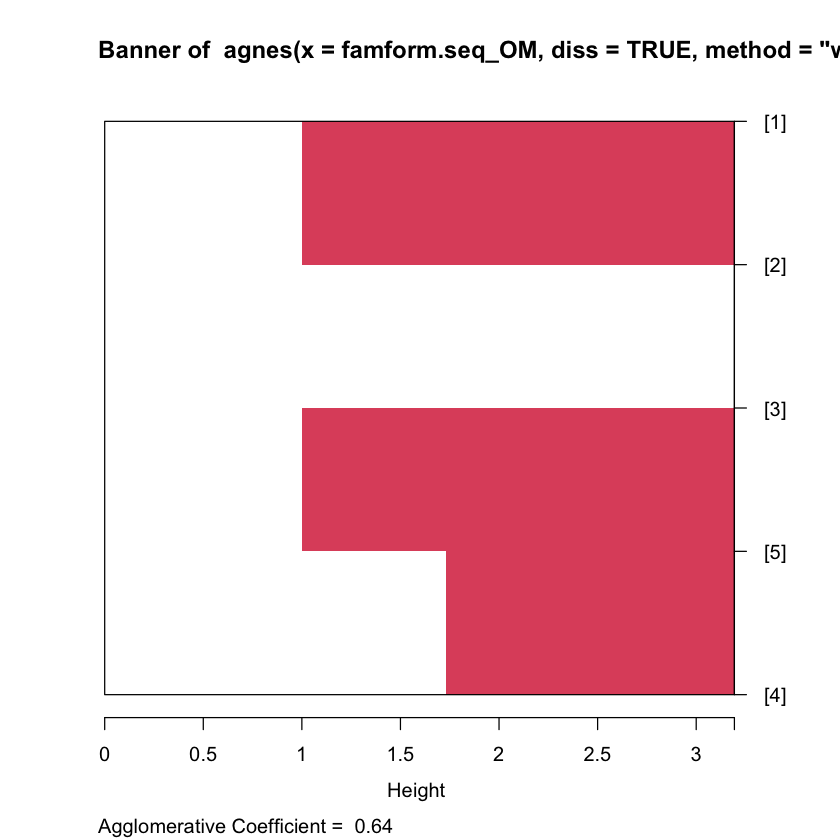

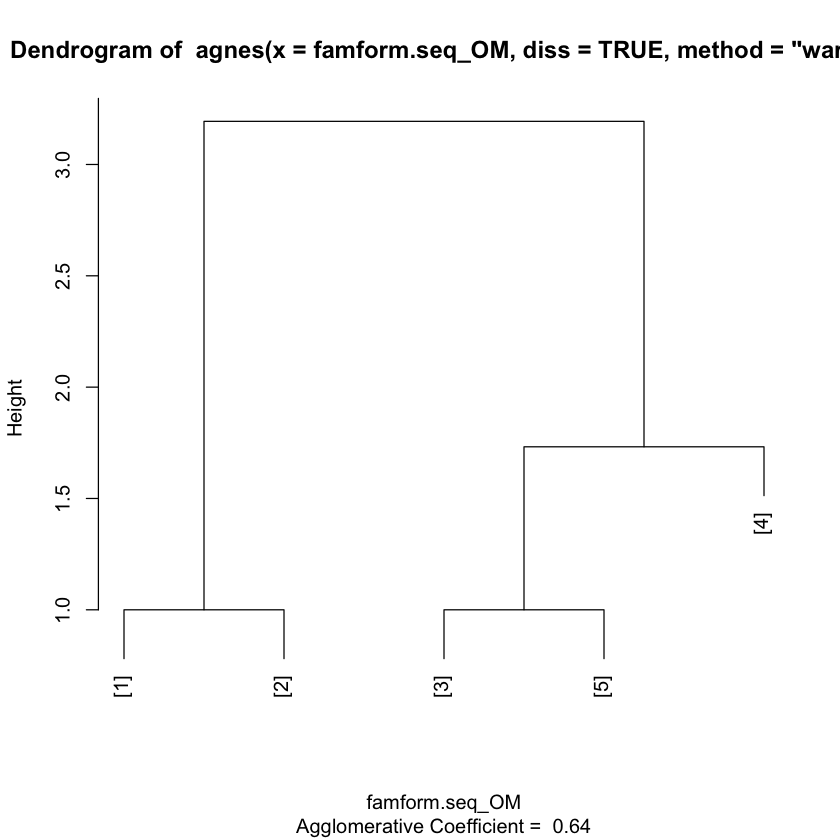

In [18]:
famform.seq
plot(clusterward)

**How do we measure the dissimilarity between two clusters of observations?**

| Linkage methods  | Description                                                                                                                                                                             |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Single linkage   | The distance between one cluster and another cluster is taken to be equal to the shortest distance from any data point of one cluster to any data point in another (nearest neighbour)  |
| Average linkage  | The distance between two clusters is the average of the dissimilarities between the points in one cluster and the points in the other cluster                                           |
| Complete linkage | The distance between one cluster and another cluster is taken to be equal to the longest distance from any data point of one cluster to any data point in another (futherest neighbour) |
| Ward             | Minimizes the total within-cluster variance. At each step the pair of clusters with the smallest between-cluster distance are merged                                                    |

Match each of the following figure to an appropriate linkage method

Figure A --> ?
Figure B --> ?
Figure C --> ?

![](https://www.researchgate.net/profile/Yu-Qian-18/publication/350350844/figure/fig2/AS:1012170494074883@1618331659642/The-distance-between-two-clusters-defined-in-single-linkage-SL-A-complete-linkage.png)

Source: https://www.researchgate.net/figure/The-distance-between-two-clusters-defined-in-single-linkage-SL-A-complete-linkage_fig2_350350844

**How do you pick the number of clusters?**

We usually look at the largest difference of heights

![](https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r_files/optimal%20number%20of%20clusters%20hierarchical%20clustering.png)

Source: https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r/

Check out this amazing cheatsheet too: https://statsandr.com/blog/files/Hierarchical-clustering-cheatsheet.pdf

**Where would you draw the line to determine optimal k clusters for each of the dendogram below?**
![](img/dendograms.png)

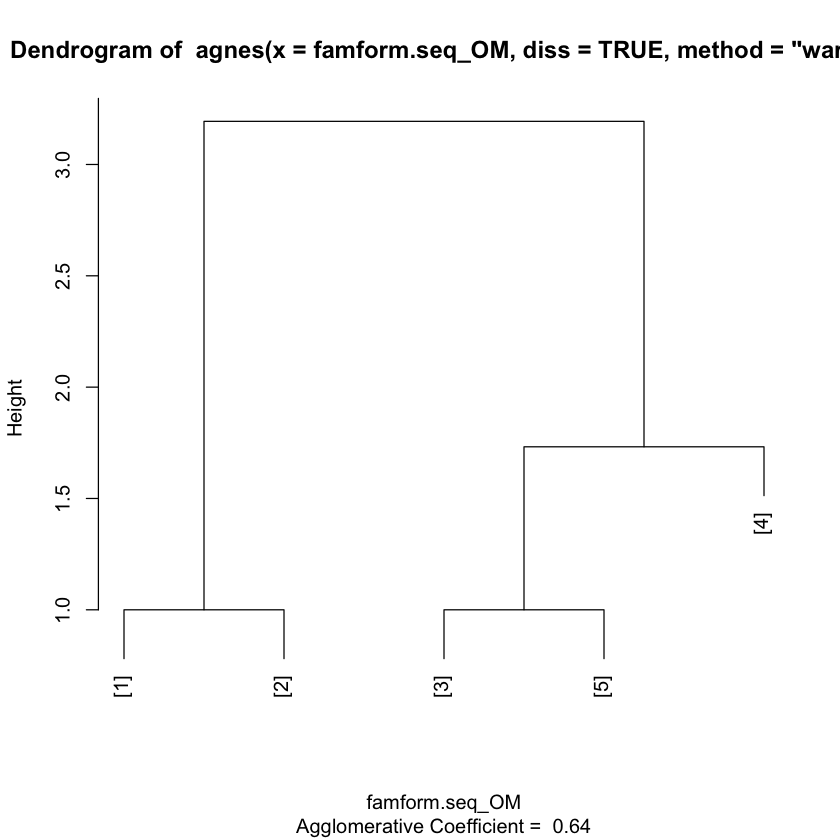

In [19]:
plot(clusterward, which.plot=2)

[1] Type 1 Type 1 Type 2 Type 2 Type 2
Levels: Type 1 Type 2

cluster2
1 2 
2 3 

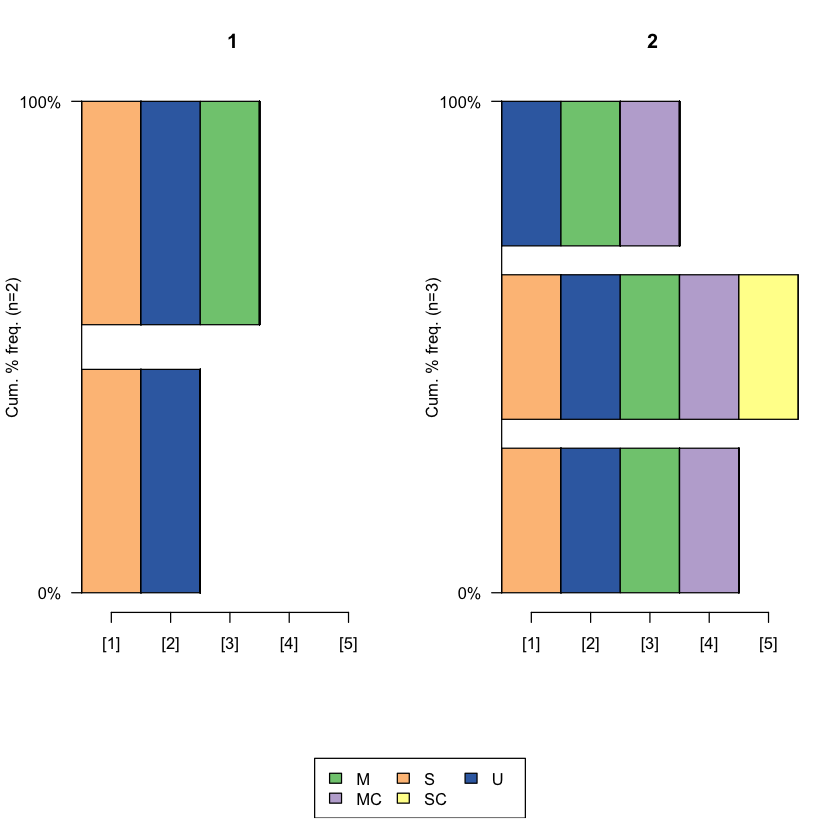

In [20]:
# cut the dendogram tree to generate two clusters
cluster2 <- cutree(clusterward, k = 2)

# create label for clusters
factor(cluster2, labels = c("Type 1", "Type 2"))

# check the number of observations in each cluster
table(cluster2)

# plot sequence frequency by cluster membership
seqfplot(famform.seq, group = cluster2, pbarw = T)

Check the documentation for more details of hierarchical clustering `?agnes`

In [21]:
# ?agnes